# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


/Users/giusepperomagnuolo/.virtualenvs/datascience/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/giusepperomagnuolo/.virtualenvs/datascience/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = prices.sort_values(ascending=True).values[0]

# TODO: Maximum price of the data
maximum_price = prices.sort_values(ascending=False).values[0]

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))


Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can be phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

* As for the number of rooms, `'RM'` value, I would assume that a higher number of rooms would **correlate to a higher price**. Properties with more rooms would generally have a larger SQ.FT. area, basically being them bigger properties and therefore cost more.
* As for the percent of lower class workers in a neighborhood, `'LSTAT'` value, I would expect it to **have a negative correlation to the house price**. Lower class workers can afford less expensive properties and therefore a higher percentage of lower class workers would indicate that the neighborhood overall has lower price properties. I would assume therefore that the price of a property have a strong correlation to the average property price in their neighborhood.
* As for the `'PTRATIO'`, the ratio of students to teachers in primary and secondary schools in the neighborhood, I would assume **has a negative correlation**, maybe a relatively weak one, to the property price. Generally low income neighborhood, where property prices are lower, tend to be over populated. I would imagine more high block of flats and fewer spread out houses and as such schools have to cater for a high number of students so there is a good chance that classes are more crowded than welthier neighborhoods.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

An R2 score of 0.923 indicates that 92.3% of the variance of the dependent variable (y_true) is predictable from the independent variable (y_predict) of our model. The percentage calculated is close to 100% so we can say that the model have successfully captured most of the variation of the target variable.

**R2 tells us what percent of the prediction error is eliminated when we use our model compared to a simple model using the the mean as a predictor.**

We can manually calculate R2 as follows:

$R^2=\frac{SquareResidualUsingMean - SquareResidualWithModel}{SquareResidualUsingMean}$

Where:
- SquareResidualWithModel = the Sum of Squared residuals having fitted our model (sum of the square distance between the predicted point (Y') and the true Y.
- SquareResidualUsingMean = calculate the Sum of squared residuals using the mean as a predictor (sum of their square distances from the mean) 

As seen above R2 tells us what percent of the prediction error in the Y variable is eliminated when we use our model.

It is to be noted that R2 has some limitations such that we can have a high R2 score but the model has some inherent bias, this bias can be identified by analysing the **Residual plot**. This latter plots the predicted values against the actual values, a good model will have the residuals points distributed around the residual line, on the other hand if they form a patterns or skewed towards one side of the line it indicates that the model has some bias and underfit the data.

**Manual R2 Score calculation using Python:** 

In [5]:
Y = np.array([3, -0.5, 2, 7, 4.2])
YPred = np.array([2.5, 0.0, 2.1, 7.8, 5.3])

mu = np.mean(Y)
SquareResidualUsingMean = np.sum(np.square(Y-mu))
SquareResidualWithModel = np.sum(np.square(Y-YPred))

R2 = (SquareResidualUsingMean - SquareResidualWithModel) / SquareResidualUsingMean

print('The manually calculated R2 is: {:,.3f}'.format(R2))

The manually calculated R2 is: 0.923


### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

When training a ML model, the training algorithm will try to find the best fit to the data at hand minimising its error. 
One of the problem that may occurr is for the model to _memorise_ the training data, in effect create a perfect fit for the training data (which we should not forget it is just a sample of the entire data population) but it might not generalise well when used to predict using data not seen before. This problem is called **overfitting** or **high variance**. 

On the other hand, if the sample of data we use to train our model is too small the model may be over simplistic in effect missing the key feature of the data, also in this case it won't predict well with new data. This last problem is called **underfitting** or **high bias**. 

The aim of splitting the data in a training and testing set is to allow to train our model on enough samples but then evaluate it using the test set which must be data unseen before. The aim is have our model capture a _pattern_ in the data rather than painstakingly _memorise_ the data it trained with. 

There are different common ratios used to divide the data between training and testing subsets and it greatly depends on the number of samples in the initial dataset. 80/20 is quite a common ratio using in splitting the training and testing subset which allows enough data for training the model and a 1/5 of the data dedicated to evaluating the model.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

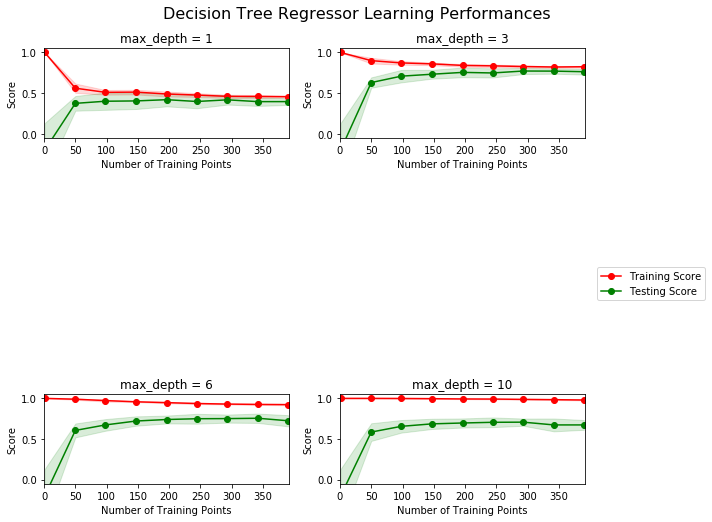

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

* From the graph produced above, `max_depth = 3` is the best hyperparameter for the Decision Tree model above, both training and testing score convergeto a R2 score of `~0.8` creating a model that is not too simplistic nor is overfitting the data and producing the highest **Testing R2 score** among the 4 choices of hyperparameter.
* As the number of training points increase we can see how the **Training R2 score** goes slightly down flattening at about a score of `0.8`. The **Testing R2 score** curve shows that with a number of training points lower than 50 the model is overly simplistic (high bias), at around 300 training points the R2 score of the testing set reaches about `0.8`, certainly converging with the Training R2 score at one standard deviation.
* From the graph we can see that 300-350 training data points are enough to have both the **Training R2 score curve** and the **Testing R2 score curve** converge. Adding more training points might marginally increase the Testing R2 score, however might not be a significant increase as the two curves seem have already flattened out.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

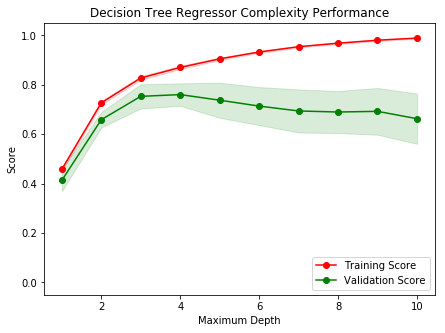

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

* When the model is training with a maximum depth of 1, the model suffers of high bias, the model is too simplistic and underfits. The visual clue is that at maximum depth of 1 both the Training Score and Validation Score perform poorly, this indicates that the model simply is too naive and is not able to predict accurately even data points that has seen during testing.  
* When the model is training with a maximum depth of 10, the model suffers of high variance, the model has 'memorised' the training data by overfitting the data, it performs poorly in validation. The visual clue is that while the Training Score is high, the Validation Score drops significantly, the model can predicts accurately only data that has seen before, it has in effect made an overly complex model that is not able to generalise and explain unseen data.  

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

* The model trained with a **maximum depth of 4** seem to be 'just right', the validation score is at its peak and the model is neither underfitting nor overfitting.
* This is because the validation score creates a concave curve, peaking around the centre, on its left the score is low as well as the training score, this indicates a too simplistic model where both the training and validation set perform poorly, on its right the validation curve slopes downwards while the training curve continue to go up. This indicates that although the model performs better on the training set, the model is overfitting the training data and is less and less accurate in predicting unseen data. In the middle the validation curve is at its peak, the model does not overfit nor underfit the training data, it is 'just right'.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

The **Grid Search** is a technique to find the best hyper-parameters for a model. To undestand why it is important it is worth to summarise the fundamental steps involved in a Machine Learning exercise:

   1. Train a model using the Training data
   1. Pick the best model using the Cross Validation data
   1. Test with the testing data to make sure the model is good

A challenge lies in how exactly to pick the best model, depending on the choosen algorithm, a model can have one or many hyper parameters and finding the best combination of hyper-parameters lies at the heart of creating a good model.

We pass the hyper-parameters to tune, the possible values for each hyper-parameter and a performance metric as input to the grid search algorithm. The Grid Search algorithm will train a model for every combination of hyper-parameters  For every resulting model it then **evaluates the performance** against the cross validation set using our chosen performance metric. Once the performance score is calcualated, the model with the highest score is chosen to be evaluated against the training set.

The technique is called 'Grid' because it can be visualised as a grid-like combination.

An example could be finding the best _Kernel_ and _Gamma_ hyperparameters for a Support Vector Machine.

The _Kernel_ can be linear or polynomial and the _Gamma_ (referred as $C$) is a numerical value generally chosen from powers of 10.

So, as an example, let's say we want to find the best combination between the following sets of hyperparameters using the F1 score:

* `Kernel: [linear, polynomial]`
* `Gamma: [0.1, 1, 10]`

A Grid search would calculate all possible combinations, which can be explained in the table below:

<table>
    <tr><th>$\frac{Kernel}{C}$</th><th>Linear<br/>&nbsp;</th><th>Polynomial<br/>&nbsp;</th></tr>
    <tr><th>0.1</th><td>F1 score = 0.5</td><td>F1 score =0.2</td></tr>
    <tr><th>1</th><td>F1 score = 0.8</td><td>F1 score = 0.4</td></tr> 
    <tr><th>10</th><td>F1 score = 0.3</td><td>F1 score = 0.3</td></tr>
</table>

From the example above we can see that a `Gamma=1` and `Kernel=Linear` produced the highest F1 score of `0.8`. We would then use the model with these hyperparameters and evaluate it against our test set. 



### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

* K-fold cross-validation is a technique employed to estimate the performance of a Machine Learning method. The $K$ in K-fold is a hyperparameter and specifies the number of buckets the K-fold cross-validation technique is going to create by splitting the training data after having shuffled it. It will then train different models $K$ times by keeping one of the buckets as a cross validation subset and the remaining $K-1$ buckets as the training subset. It will repeat the training $K$ times so that every bucket is once used as a validation set. The average performance metrics gatherered by traning a method $K$ times is going to give a good estimate of how the method will perform on unseen data, the test set. Sometimes this same technique is written down with a different name, so in the case of $K=10$, the K-fold may be referred to as 10-fold.
* We use Grid Search to gather the best hyper-parameters for our model along with k-fold cross-validation. We then use the test set to check the final performance of the model. K-fold cross-validation is employed by the Grid Search algorithm in order to help find hyper-parameters that fit models that suffer of as little bias and variance as possible so that they perform equally well on training and testing data.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [9]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    #cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    cv_sets = ShuffleSplit(n_splits= 10, test_size = 0.20, random_state = 1)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=2)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

The optimal model generated by the Grid Search has **a maximum depth of 4**. This result is in line with the earlier analysis in Question 6,  which was based on observing the shape of the complexity curve. 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


In [12]:
#Additional stats
print("Average Student-teacher ratio {:,.2f}".format(features.PTRATIO.mean()))
print("Student-teacher ratio SD: {:,.2f}".format(features.PTRATIO.std()))
print("Average room No.: {:,.2f}".format(features.RM.mean()))
print("Rooms SD: {:,.2f}".format(features.RM.std()))
print("Average Neighboroughood poverty level: {:,.2f}".format(features.LSTAT.mean()))
print("Neighboroughood poverty level SD: {:,.2f}".format(features.LSTAT.std()))

Average Student-teacher ratio 18.52
Student-teacher ratio SD: 2.11
Average room No.: 6.24
Rooms SD: 0.64
Average Neighboroughood poverty level: 12.94
Neighboroughood poverty level SD: 7.08


**Answer: **


* Our estimator is suggesting **Client 1's home** could sell for \$403,025.00. The suggested price is below the average property price but within 1 standard deviation of it. The property has 1 room less than the average property, the neighboroughood poverty level is within 1 standard deviation of the average Boston neighboroughood poverty level, the student-teacher ratio is low and also within 1 standard deviation of its respective average.  The price suggested by the estimator seems in line with the property features. 
**I would recommend Client 1 to put their property on the market for $403,025.00.**
* As for **Client 2's home** our estimator is suggesting \$237,478.72. The price is low however is above the minimum property price in the Boston area, also considering that the average number of rooms in Boston is 6.24, this property has only 4 rooms, also considering that the neighboroughood poverty level is 2 standard deviations above the mean neighboroughood poverty level and also that the student-teacher ratio is more than 1 standard deviation above the area average, it seems that the suggested lower price is justified. **I would recommend Client 2 to put their property on the market for \$237,478.72.**
* As for **Client 3's home** the estimator have suggested a price of \$931,636.36. The price is high but it is within the maximum property price in our dataset, also the property boasts 8 rooms, more than 2 standard deviations above the average in the Boston area, the neighboroughood poverty is nearly 2 standard deviation below the mean and exceptionally low student-teacher ratio. These features make this property quite exceptional compared to other properties in the dataset which justifies the higher estimated price. **I would recommend Client 3 to put their property on the market for \$931,636.36.**



### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [13]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $414,430.43
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

PredictTrials() output shows that when training our model with different subsets of data we have different predictions with a variance of about 10%, (although in test runs I have done with different random states used in our fit_model method the variance goes up to 18%) 10-18% variance **is not be bad** considered that also expert real estate professionals give different valuation. 

However this model is **not fit to predict properties in today's age.** Although the data set price has been multiplicatively scaled to account for years of market inflation is certainly not representative of today property market. Additional factors like **amenities, transporation links, shopping centres, parks, schools** etc. that have been built in a given area **are important factors not captured in 40 year old data**. If the dataset were to be built today, it will include also other features like energy efficiency, double glazing windows, distance to public transport, amenities, restaurants and possibly swimming pool and quality of appliances.

Also data collected in one city is not representative of other areas and I believe such model would perform very poorly if it were to predict property prices in rural city.

I believe prices of an individual home have a strong correlation to characteristics of the entire neighborhood so I think it is certainly important to use neighborhood characteristics as part of the predictor variables.

So going back to the original question, whether the constructed model should or should not be used in a real-world setting, my answer is as follows. if by **real-world** we refer to **today's age** I would consider the model **not fit for purpose.** If in the question **real-world** meant the **real-world back in 1978,** I think **yes, the model could have been used in real-world to help predict house prices in the Boston area but not in other areas like rural areas**.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.